In [131]:
import numpy as np
import cv2
import pandas as pd
import collections
import math
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
image = io.imread('./images/colorcast/costa-calida.jpg')

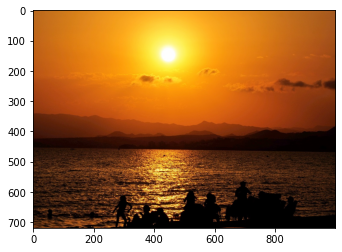

In [119]:
plt.imshow(image)

In [147]:
def apply_threshold(matrix, low_value, high_value):
    #Get array of bools with the condition
    low_mask = matrix < low_value
    #Call function
    matrix = apply_mask(matrix, low_mask, low_value)
    #Get array of bools with the condition
    high_mask = matrix > high_value
    #Call function
    matrix = apply_mask(matrix, high_mask, high_value)
    return matrix

In [148]:
def apply_mask(matrix, mask, fill_value):
    #Apply mask, what mean we're going to change the values in true with the threshold that we've calculated
    masked = np.ma.array(matrix, mask=mask, fill_value=fill_value)
    return masked.filled()


In [151]:
#Check if the image has 3 channels
assert image.shape[2] == 3
#Get channels
channels = cv2.split(image)
#Percent
half_percent = 0.04
#Array of channels
out_channels = []
#For of each channel
for c in channels:
    #Get height and width
    height, width = c.shape[:2]
    #Get total size of the picture
    vec_size = width * height
    #flat the matrix to one only array
    flat = c.reshape(vec_size)
    #Get Percentile Range based on the percent
    low_val = np.percentile(flat, half_percent * 100)
    high_val = np.percentile(flat, (1 - half_percent) * 100)
    #Call function
    thresholded = apply_threshold(c, low_val, high_val)
    #Normalize the values to 0 from 255
    normalized = cv2.normalize(thresholded, thresholded.copy(), 0, 255, cv2.NORM_MINMAX)
    #Add channel to array of Channels
    out_channels.append(normalized)
#Merge channels in only one
final_image = cv2.merge(out_channels)
#Save the image
plt.imsave("chicor_1.jpg", final_image)